<a href="https://colab.research.google.com/github/Elgendi/Machine-Learning-and-Data-Viz-Workshop/blob/master/Visualization_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Machine Learning and Visulization for Healthcare Data: Foundtions (Part 1)
# Python libraries for working with data (load, process, and visulize)

In [ ]:
# Copyright (c) Mohamed Elgendi 2020. All rights reserved
# Author: Mohamed Elgendi 
# Version: 1.0 (2020.11.29)
# Email: moe.elgendi@gmail.com
# Platform: Tested on Windows 10 with Python 3.6

### Objectives
 - Learn how to use Pandas to easily and efficiently analyze data
 - Review some simple statistical operations
 - Complete the exercises

### Background reading
- Pandas dataframe docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
- More on visualization in matplotlib can be found here: https://matplotlib.org/
- More on visualization in seaborn can be found here: https://seaborn.pydata.org/


## Introduction to Pandas

Pandas is a python library for data analysis. At the core of Pandas, lies the concept of a 'DataFrame' - this can be thought of as powerful type of dictionary designed for data analysis.

The DataFrame is designed to manage indexed and labeled data, not too different from a SQL database table or a worksheet in a spreadsheet application. Consider the following creation of a DataFrame object:

In [ ]:
#All libs used in the tutorial
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame([20, 60, 13, 40], columns=['Age'],
                  index=['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4'])
df

,Age
Subject 1,20
Subject 2,60
Subject 3,13
Subject 4,40


We observe a number of important proporties of the dataframe:
- Data itself can be provided in different shapes and types (list, tuple, ndarray, and dict objects are candidates). 
- Labels: Data is organized in columns, which can have custom names. 
- Index: There is an index that can take on different formats (e.g., numbers, strings, time information). 

The following examples demonstrate several of the most import methods and properties of the Pandas dataframe object.

In [2]:
df.index  # the index values

Index(['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4'], dtype='object')

In [3]:
df.columns  # the column names

Index(['Age'], dtype='object')

In [4]:
df.loc['Subject 1'] # selection via index

Age    20
Name: Subject 1, dtype: int64

In [5]:
df.loc[['Subject 1', 'Subject 2']]  # selection of multiple indices

,Age
Subject 1,20
Subject 2,60


In [6]:
df.iloc[-1]  # selection via Index object

Age    40
Name: Subject 4, dtype: int64

In [7]:
df.values # note: we extract values as an array

array([[20],
       [60],
       [13],
       [40]])

In [8]:
df.Age.std()  # sum per column

21.187653637594387

In [9]:
df.Age.mean()

33.25

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,Age
Subject 1,400
Subject 2,3600
Subject 3,169
Subject 4,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,Age
Subject 1,400
Subject 2,3600
Subject 3,169
Subject 4,1600


# Adding a new column
Adding a new feature/column to the original dataframe is so simple.
All we need to do is put the new column between two single quotations, and then assign values as follows.

In [12]:
df['A'] = [1.9, 2.5, 3.5, 4.5]  # new column is generated
df


,Age,A
Subject 1,20,1.9
Subject 2,60,2.5
Subject 3,13,3.5
Subject 4,40,4.5


# Deleting a column

We use the drop function in the dataframe.

In [13]:
df.drop(columns='A')

,Age
Subject 1,20
Subject 2,60
Subject 3,13
Subject 4,40


# Exercise 1: Create a new dataframe with 4 attributes/columns for 3 subjects
The 4 attributes are Age, BMI, SBP, DBP, Echo

# Exercise 2: Square the Age column

 Hint: access Age via df first.

# Exercise 3: Remove the Echo column

 Hint: use the drop built-in function.

In [14]:
df2 = pd.DataFrame(np.arange(1,1000),columns=['integers'])
df3 = df2.apply(lambda x: np.sin(x))

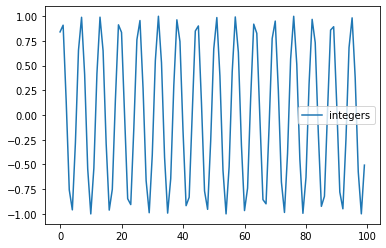

In [15]:
df3[0:100].plot()

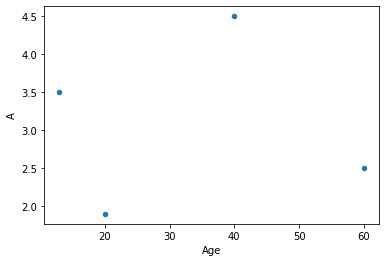

In [16]:
df.plot.scatter('Age','A') # note that it takes columns only

# Exercise #1: scatter ['s1','s2','s3','s4'] vs. Age.

In [17]:
df['names'] = pd.DataFrame(['Lisa', 'Bill', 'Rob', 'Depang'],
                           index=['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4'])
df

,Age,A,names
Subject 1,20,1.9,Lisa
Subject 2,60,2.5,Bill
Subject 3,13,3.5,Rob
Subject 4,40,4.5,Depang


In [18]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,Age,A,names,numbers,floats
Subject 1,20.0,1.9,Lisa,NaN,NaN
Subject 2,60.0,2.5,Bill,NaN,NaN
Subject 3,13.0,3.5,Rob,NaN,NaN
Subject 4,40.0,4.5,Depang,NaN,NaN
z,NaN,NaN,Henry,100.0,5.75


In [19]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))

,Age,A,names,numbers,floats,squares
Subject 1,20.0,1.9,Lisa,NaN,NaN,NaN
Subject 2,60.0,2.5,Bill,NaN,NaN,NaN
Subject 3,13.0,3.5,Rob,NaN,NaN,NaN
Subject 4,40.0,4.5,Depang,NaN,NaN,NaN
z,NaN,NaN,Henry,100.0,5.75,NaN


## Load Data Using Pandas

We shall now turn to collecting and performing basic summary statisical information on some time series data. This is data that is commonly used in digital health, more time series data exist everywhere, for example, monthly heart rate data. Once we understood how to apply key statistical operations to the dataframe, we shall then briefly review more advanced time series functions.

# Now we will switch to Power Point Presenation.
Lets go to Colab

#At this stage it is expected that you can read files 

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
df=pd.read_csv('/content/drive/MyDrive/07.csv')

In [23]:
df.dropna()

,Elapsed time,ECG,EMG,foot GSR,hand GSr,HR,marker,RESP
0,'0:00.000',-0.044,0.036,8.763,5.675,88,10.85,43.54
1,'0:00.002',-0.037,0.036,8.763,5.675,88,10.85,43.54
2,'0:00.004',-0.031,0.036,8.763,5.675,88,10.85,43.54
3,'0:00.006',-0.023,0.036,8.763,5.675,88,10.85,43.54
4,'0:00.008',-0.018,0.036,8.763,5.675,88,10.85,43.54
...,...,...,...,...,...,...,...,...
1048569,'35:14.050',-0.037,0.233,12.609,6.881,71,11.22,35.12
1048570,'35:14.052',-0.001,0.233,12.609,6.881,71,11.22,35.12
1048571,'35:14.054',0.022,0.233,12.609,6.881,71,11.22,35.12
1048572,'35:14.056',0.011,0.233,12.609,6.881,71,11.22,35.12


In [24]:
df2=df.replace({'\'': ''}, regex=True)

In [25]:
df2

,Elapsed time,ECG,EMG,foot GSR,hand GSr,HR,marker,RESP
0,0:00.000,-0.044,0.036,8.763,5.675,88,10.85,43.54
1,0:00.002,-0.037,0.036,8.763,5.675,88,10.85,43.54
2,0:00.004,-0.031,0.036,8.763,5.675,88,10.85,43.54
3,0:00.006,-0.023,0.036,8.763,5.675,88,10.85,43.54
4,0:00.008,-0.018,0.036,8.763,5.675,88,10.85,43.54
...,...,...,...,...,...,...,...,...
1048569,35:14.050,-0.037,0.233,12.609,6.881,71,11.22,35.12
1048570,35:14.052,-0.001,0.233,12.609,6.881,71,11.22,35.12
1048571,35:14.054,0.022,0.233,12.609,6.881,71,11.22,35.12
1048572,35:14.056,0.011,0.233,12.609,6.881,71,11.22,35.12


In [26]:
df2.set_index('Elapsed time')

,ECG,EMG,foot GSR,hand GSr,HR,marker,RESP
Elapsed time,,,,,,,
0:00.000,-0.044,0.036,8.763,5.675,88,10.85,43.54
0:00.002,-0.037,0.036,8.763,5.675,88,10.85,43.54
0:00.004,-0.031,0.036,8.763,5.675,88,10.85,43.54
0:00.006,-0.023,0.036,8.763,5.675,88,10.85,43.54
0:00.008,-0.018,0.036,8.763,5.675,88,10.85,43.54
...,...,...,...,...,...,...,...
35:14.050,-0.037,0.233,12.609,6.881,71,11.22,35.12
35:14.052,-0.001,0.233,12.609,6.881,71,11.22,35.12
35:14.054,0.022,0.233,12.609,6.881,71,11.22,35.12


In [27]:
df2.describe()

,ECG,EMG,foot GSR,hand GSr,HR,marker,RESP
count,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06
mean,-3.469524e-03,1.491908e-01,9.141651e+00,6.170585e+00,7.593876e+01,1.177907e+01,3.841916e+01
std,2.150053e-01,3.429084e-01,3.107835e+00,2.147025e+00,8.188724e+00,2.236462e+00,3.303137e+00
min,-4.142000e+00,-8.154000e+00,4.375000e+00,0.000000e+00,4.300000e+01,0.000000e+00,2.909000e+01
25%,-8.700000e-02,4.600000e-02,5.961000e+00,4.331000e+00,7.000000e+01,1.026000e+01,3.553000e+01
50%,-4.900000e-02,6.200000e-02,9.829000e+00,6.292000e+00,7.500000e+01,1.124000e+01,3.937000e+01
75%,2.900000e-02,1.190000e-01,1.187000e+01,7.766000e+00,8.200000e+01,1.300000e+01,4.089000e+01
max,2.351000e+00,8.121000e+00,1.567100e+01,1.385700e+01,1.070000e+02,8.777000e+01,5.794000e+01


## Plotting DataFrames
In the following example, we shall demonstrate how to plot the columns of the dataframe against the time index using the matplotlib module. 

Populating the interactive namespace from numpy and matplotlib


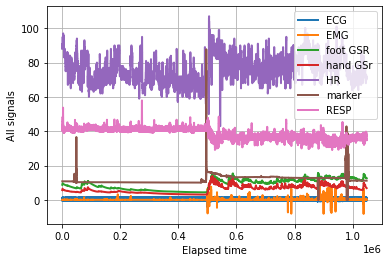

In [28]:
%matplotlib inline  
%pylab inline
import matplotlib.pyplot as plt
df2.plot(lw=2., grid=True)
plt.xlabel('Elapsed time')
plt.ylabel('All signals')
plt.savefig('output.png')

We observe that the different instruments, i.e. the columns, are scaled differently. It is therefore convenient to normalize the data by calculating the returns. We shall first perform a quick visual check that the normalized data looks 'reasonable'. We use the tail() member function of the dataframe to view the 5 most recent observations of the data. 

In [29]:
Cols=df2.columns.values.tolist()[1:]
Cols

['ECG', 'EMG', 'foot GSR', 'hand GSr', 'HR', 'marker', 'RESP']

We measure the correlation between time series. Here we shall explore VIX returns and its relation to single named equity returns in order to observe the "leverage effect". We shall print the pair-wise correlations in addition to producing scatter plots of the equity returns against the VIX returns.

In [30]:
df2[['ECG','HR']].corr()

,ECG,HR
ECG,1.00000,-0.00469
HR,-0.00469,1.00000


# Exercise #2: Calcualte the correlation matrix for all attributes.
Hint: add attributes

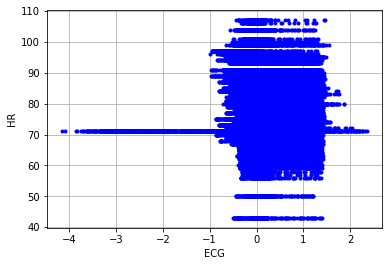

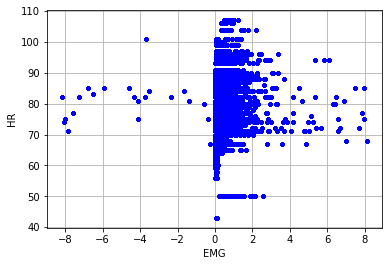

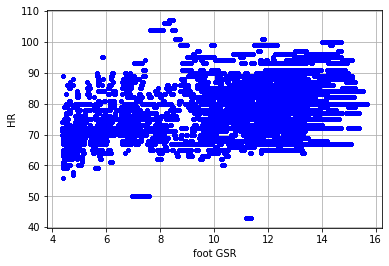

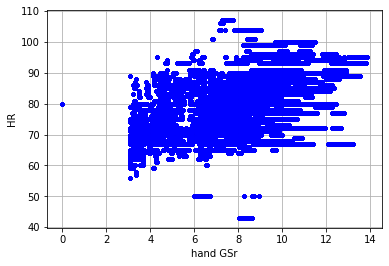

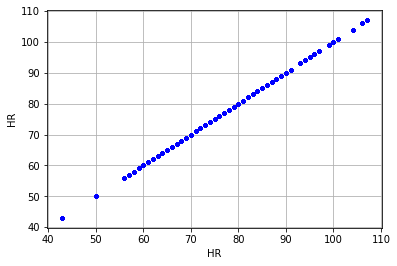

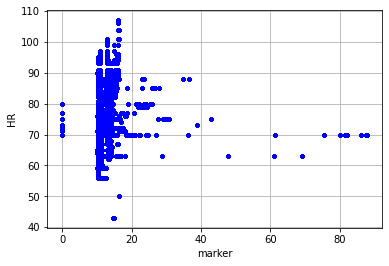

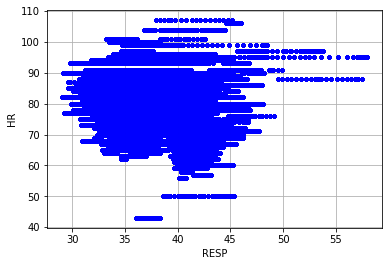

In [31]:
for symbol in Cols:
  xdat = df2[symbol]
  ydat = df2['HR']
  plt.plot(xdat, ydat, 'b.')
  ax = plt.axis()  # grab axis values
  plt.grid(True)
  plt.xlabel(symbol)
  plt.ylabel('HR')
  plt.show()

# Excercise #3: Plot the two attributes that are highly correlated.
Hint: check the correlation matrix

In [32]:
df2['ECG'].diff() # easy way to calculate log differences

0            NaN
1          0.007
2          0.006
3          0.008
4          0.005
           ...  
1048569    0.025
1048570    0.036
1048571    0.023
1048572   -0.011
1048573   -0.027
Name: ECG, Length: 1048574, dtype: float64

In [33]:
df2['ECG'].diff().dropna() # can also drop NaN values

1          0.007
2          0.006
3          0.008
4          0.005
5          0.001
           ...  
1048569    0.025
1048570    0.036
1048571    0.023
1048572   -0.011
1048573   -0.027
Name: ECG, Length: 1048573, dtype: float64

In [34]:
#We can create bolean vectors 
df2['ECG'].diff().head(10) > 0.006

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: ECG, dtype: bool

In [35]:
#and we can use the vectors to chose the elements in the dataframe
df2[df2['ECG'] > 0.03].head()

,Elapsed time,ECG,EMG,foot GSR,hand GSr,HR,marker,RESP
13,0:00.026,0.040,0.036,8.763,5.675,88,10.85,43.54
14,0:00.028,0.055,0.036,8.763,5.675,88,10.85,43.54
15,0:00.030,0.060,0.036,8.763,5.675,88,10.85,43.54
16,0:00.032,0.066,0.036,8.765,5.678,88,10.85,43.40
17,0:00.034,0.071,0.036,8.765,5.678,88,10.85,43.40


In [37]:
#we can also work in a similar manner with a specific column of the dataframe
df2['foot GSR'][df2['ECG'] > 0.03].head()

13    8.763
14    8.763
15    8.763
16    8.765
17    8.765
Name: foot GSR, dtype: float64

In [38]:
#Suppose we want to use a very specific location in a dataframe
t = [3,4]
#we can easily do that with the locator
df2.iloc[t]

,Elapsed time,ECG,EMG,foot GSR,hand GSr,HR,marker,RESP
3,0:00.006,-0.023,0.036,8.763,5.675,88,10.85,43.54
4,0:00.008,-0.018,0.036,8.763,5.675,88,10.85,43.54


Text(0, 0.5, 'Frequency')

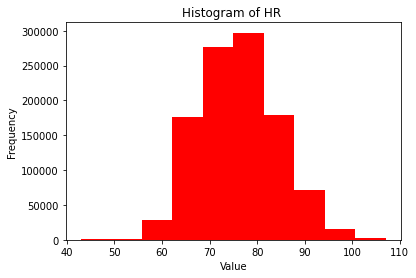

In [39]:
#Plotting histogram
num_bins = 10
plt.hist(df2['HR'].dropna(), num_bins, facecolor = 'red')
plt.title("Histogram of HR ")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

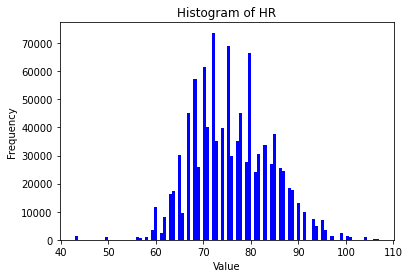

In [40]:
#Plotting histogram
num_bins = 100
plt.hist(df2['HR'].dropna(), num_bins, facecolor = 'blue')
plt.title("Histogram of HR")
plt.xlabel("Value")
plt.ylabel("Frequency")

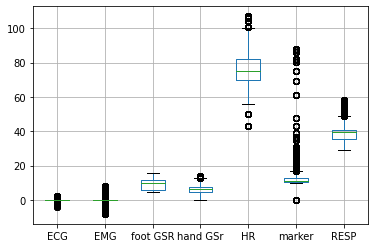

In [41]:
#plotting boxplot
df2.boxplot()
plt.xticks() #try to rotate rotation=45
plt.show()

In [42]:
# Lets use boxplot from Seaborn
sns.boxplot(data=df2)

NameError: ignored

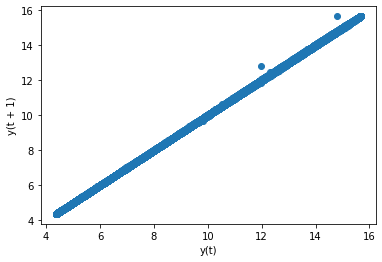

In [43]:
# plotting lag plots
#Strong autocorrelation
pd.plotting.lag_plot(df2['foot GSR']) # try lag =2
plt.show()

#Due to:
#phenomenon under study; or
#drifting in the environment; or
#contamination from the data acquisition system?

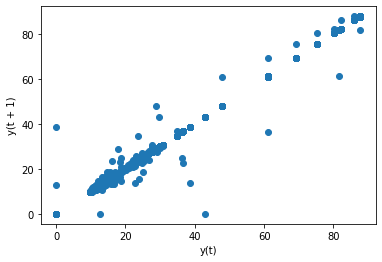

In [44]:
#moderate autocorrelation
pd.plotting.lag_plot(df2['marker']) # try lag =2
plt.show()

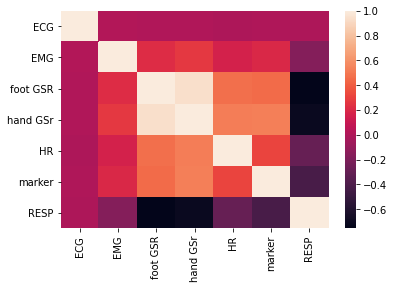

In [45]:
# Plotting heatmaps using Seaborn
import seaborn as sns

corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

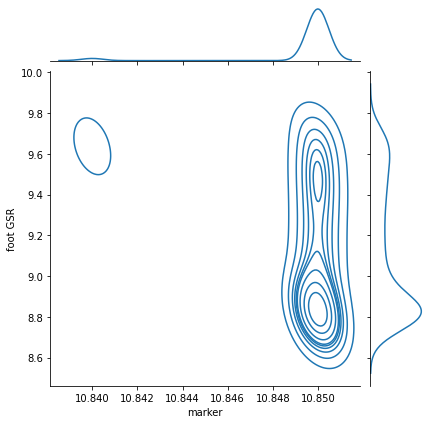

In [46]:
# Plotting joint plot using Seaborn

sns.jointplot(x="marker", y="foot GSR", data=df2[0:1000], kind="kde")

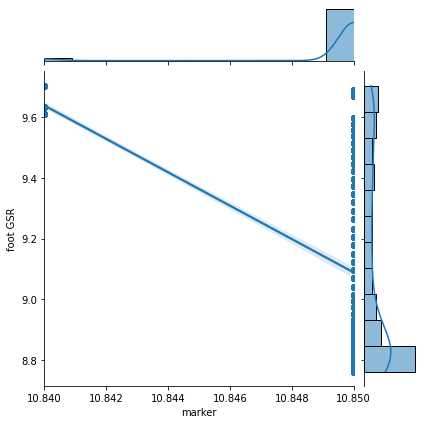

In [47]:
sns.jointplot(x="marker", y="foot GSR", data=df2[0:1000], kind="reg")

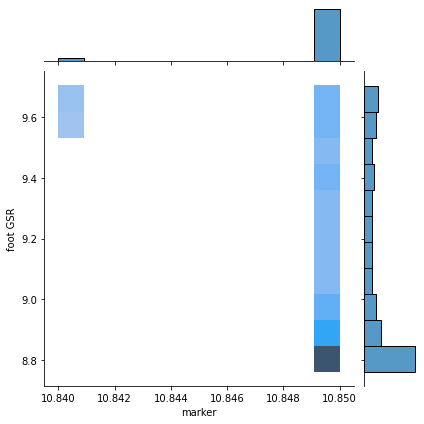

In [48]:
sns.jointplot(x="marker", y="foot GSR", data=df2[0:1000], kind="hist")

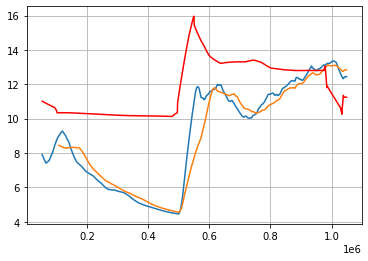

In [49]:
#df2['HR'].plot(grid=True, style=cols[1])
Fs=15
df2['foot GSR'].rolling(window=Fs*60*60*1).mean().plot(grid=True)
df2['foot GSR'].rolling(window=Fs*60*60*2).mean().plot(grid=True)
df2['marker'].rolling(window=Fs*60*60*1).mean().plot(grid=True, style='r')


## Exercise #4: plot 1 hour and 2 hour moving averages for heart rates on same graph?
Hint: replace the foot GSR with HR in the previous example

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


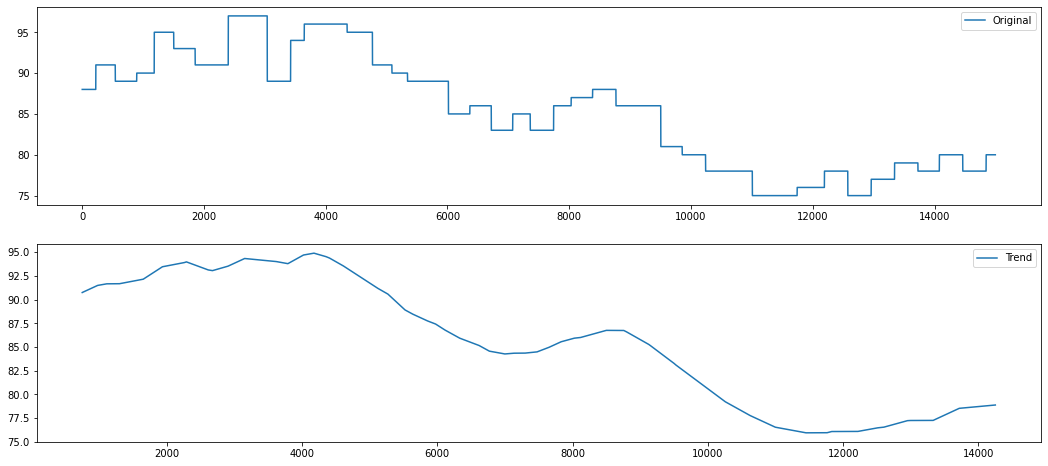

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

decomposition = seasonal_decompose(df2['HR'][1:1000*Fs], freq=100*Fs)

trend = decomposition.trend

fig = plt.figure(figsize=(18,8))

plt.subplot(211)
plt.plot(df2['HR'][1:1000*Fs], label='Original')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

# Exercise #5: Filter ECG signal using trend.

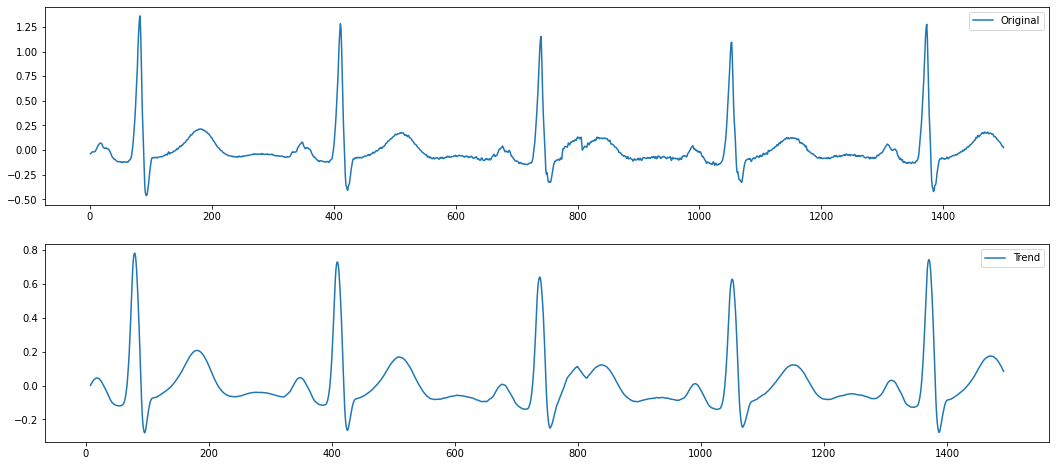

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

decomposition = seasonal_decompose(df2['ECG'][1:100*Fs], freq=1*Fs)

trend = decomposition.trend

fig = plt.figure(figsize=(18,8))

plt.subplot(211)
plt.plot(df2['ECG'][1:100*Fs], label='Original')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(trend, label='Trend')
plt.legend(loc='best')